# Statistical inference on Properties of Red Wine
Group:44

Members: Anthony Leong, Arav Dewan, Nikita Prabhu, Xiaomeng Zhou

### Introduction

Red wine has captivated human senses for centuries, and has long been a subject of fascination and inquiry. Its unique characteristics, intricate flavors, and nuanced aromas have made it a quintessential aspect of culinary culture, a source of pleasure, and a subject of scientific exploration.



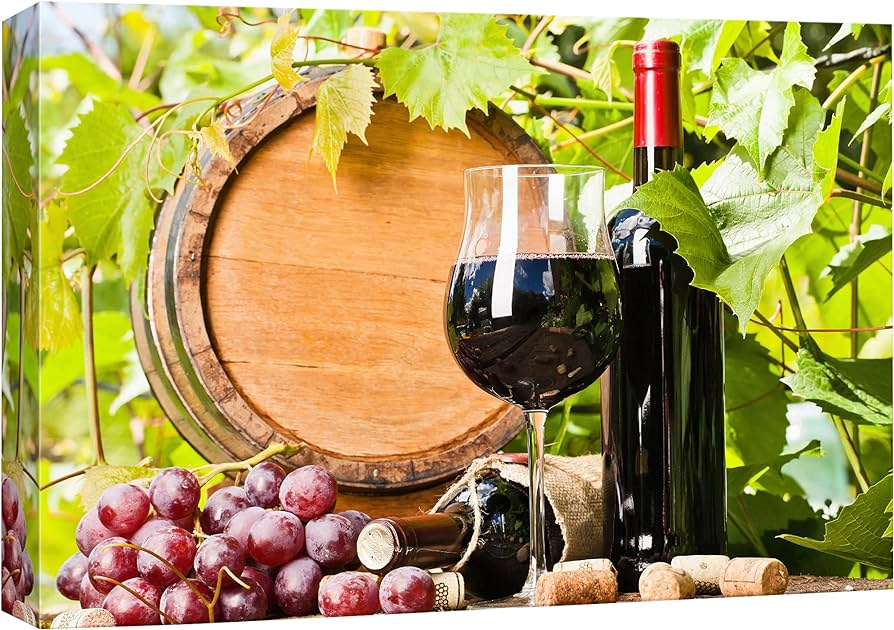



 In this study, we have divided red wine into two categories based on the quality of the wine: *Low Quality*, *High Quality* .
 We then use statistical inference to understand the differences in the composition in different qualities of red wines.
 This study is of great scientific importance in identifying the compositional variations in these wines as it is not possible to identify these potential variations just by relying on the human senses.

 The dataset which will be used is the [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) dataset from UCI machine learning repository.

 The variables of interest being used are:

 **Fixed Acidity:** A major wine constituent, contributing greatly to its taste, imparting the sourness or tartness that is a fundamental feature in wine taste.

 **Volatile Acidity:** The steam distillable acids present in wine, primarily acetic acid but also lactic, formic, butyric, and propionic acids, imparting a vinegar-like taste.

 The research question being answered in the study is:

 **Does Fixed Acidity and Volatile Acidity differ between different qualities of red wine?**

### Preliminary Results

In [ ]:
#loading necessary packages
library(cowplot)
library(digest)
library(infer)
library(repr)
library(tidyverse)
install.packages("corrplot")
library(corrplot)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [ ]:
#reading dataset
options(repr.matrix.max.rows = 8)
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
raw_wine_data <- read_delim(url, skip = 1, delim = ";",
                            col_names = c("fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar",
                                          "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide",
                                          "density", "pH", "sulphates", "alcohol", "quality"))
print("Tidy wine data:")
raw_wine_data

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Tidy wine data:"


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


The data is already in tidy format, so there is no need to clean and wrangle the data.

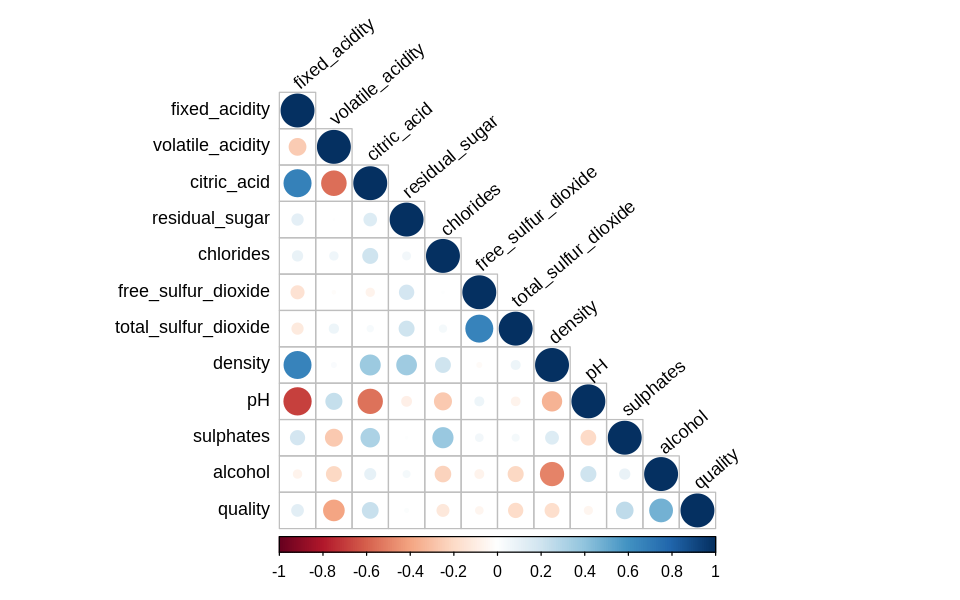

In [ ]:
#correlation plot
options(repr.plot.width = 8, repr.plot.height = 5)

r_values <- cor(raw_wine_data)

corrplot <- corrplot(r_values, type = "lower", tl.col = "black", tl.srt = 40, tl.cex = 0.9)

interpretation of correlation plot

Since we want to divide the sample into two groups, "low" quality and "high" quality, we can visualize the distribution of quality scores to get a sense of how to divide the sample.

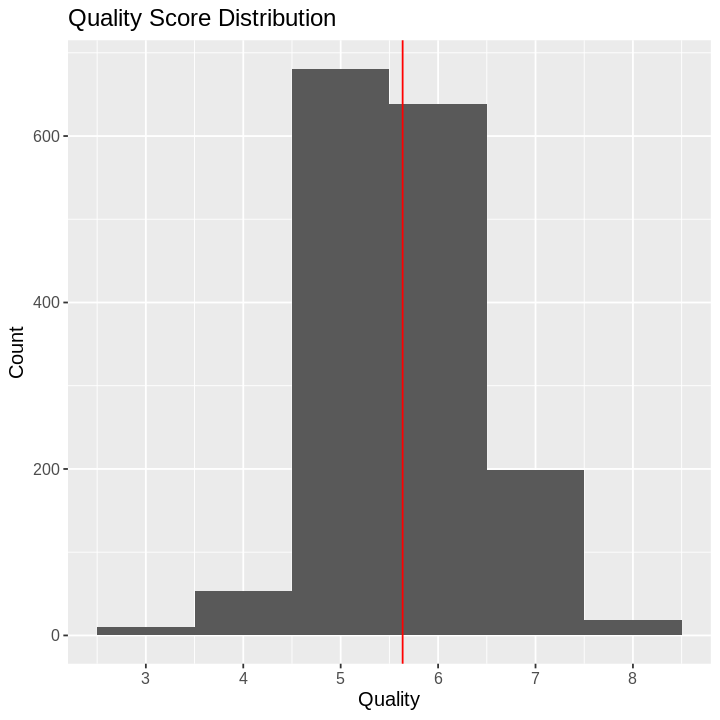

In [ ]:
#distribution of quality
options(repr.plot.width = 6, repr.plot.height = 6)

mean_quality <- raw_wine_data |>
    summarize(mean_quality = mean(quality)) |>
    pull()

raw_wine_plot <- raw_wine_data |>
    ggplot() +
    geom_histogram(aes(x = quality), binwidth = 1) +
    scale_x_continuous(breaks = c(3,4,5,6,7,8)) +
    geom_vline(xintercept = mean_quality, color = "red") +
    labs(x = "Quality", y = "Count", title = "Quality Score Distribution") +
    theme(text = element_text(size = 12)) +
    theme(text = element_text(angle = 0))
raw_wine_plot

We will consider wine with a quality score that is less than or equal to the mean as being "low" quality, and wine with a quality score that is greater than the mean as being "high quality".

In [ ]:
#converting quality to "HIGH" or "LOW"
low_quality <- raw_wine_data |>
    filter(quality <= mean_quality) |>
    mutate(quality = "LOW")

high_quality <- raw_wine_data |>
    filter(quality > mean_quality) |>
    mutate(quality = "HIGH")

wine_data <- bind_rows(low_quality, high_quality)
head(wine_data)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,LOW
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,LOW
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,LOW
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,LOW
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,LOW
7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,LOW


Now that each wine in the sample has been categorized as either "low" or "high" quality, we can compute summary statistics to estimate various parameters across each category of wine quality. We can also visualize the distributions of our two variables of interest (fixed acidity and volatile acidity) across each category of wine quality.

In [ ]:
#calculate summary statistics

low_quality_stats <- low_quality |>
    summarize(Quality = "LOW",
              n = n(),
              "Fixed Acidity Mean" = mean(fixed_acidity),
              "Fixed Acidity SD" = sd(fixed_acidity),
              "Volatile Acidity Mean" = mean(volatile_acidity),
              "Volatile Acidity SD" = sd(volatile_acidity))

high_quality_stats <- high_quality |>
    summarize(Quality = "HIGH",
              n = n(),
              "Fixed Acidity Mean" = mean(fixed_acidity),
              "Fixed Acidity SD" = sd(fixed_acidity),
              "Volatile Acidity Mean" = mean(volatile_acidity),
              "Volatile Acidity SD" = sd(volatile_acidity))

summary_stats <- bind_rows(low_quality_stats, high_quality_stats)
summary_stats

Quality,n,Fixed Acidity Mean,Fixed Acidity SD,Volatile Acidity Mean,Volatile Acidity SD
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
LOW,744,8.142204,1.572396,0.5895027,0.1779562
HIGH,855,8.474035,1.862795,0.4741462,0.1619993


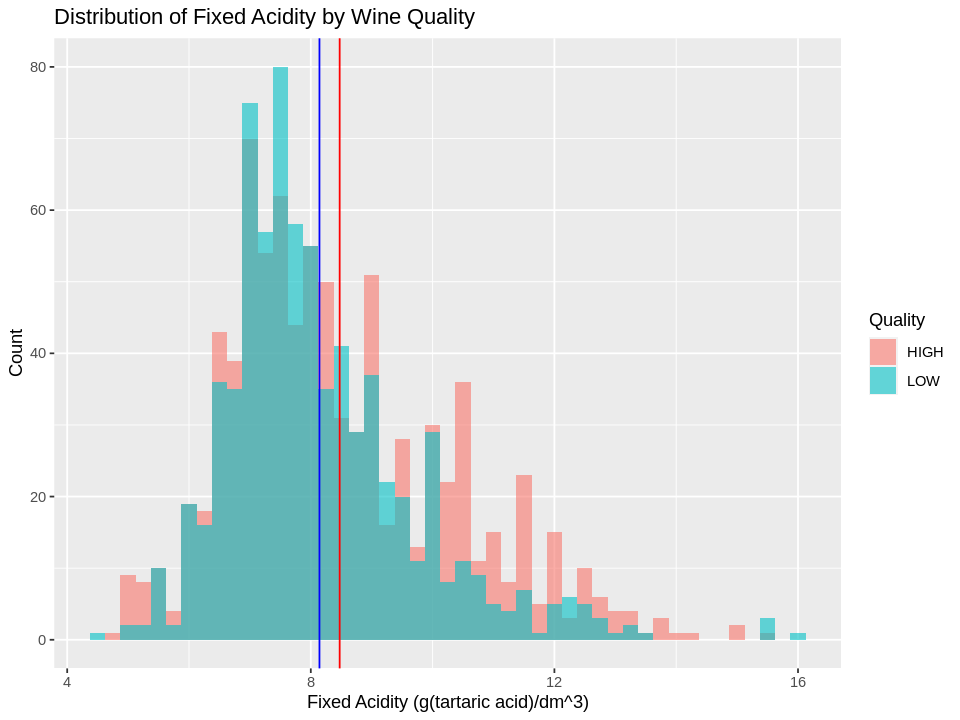

In [ ]:
#visualizing the distribution of fixed acidity by wine quality
options(repr.plot.width = 8, repr.plot.height = 6)

fixed_plot <- wine_data |>
    ggplot(aes(x = fixed_acidity, fill = quality)) +
    geom_histogram(alpha = 0.6, position = "identity", binwidth = 0.25) +
    geom_vline(xintercept = 8.474035, color = "red") +
    geom_vline(xintercept = 8.142204, color = "blue") +
    labs(x = "Fixed Acidity (g(tartaric acid)/dm^3)",
         y = "Count",
         title = "Distribution of Fixed Acidity by Wine Quality",
         fill = "Quality")
fixed_plot

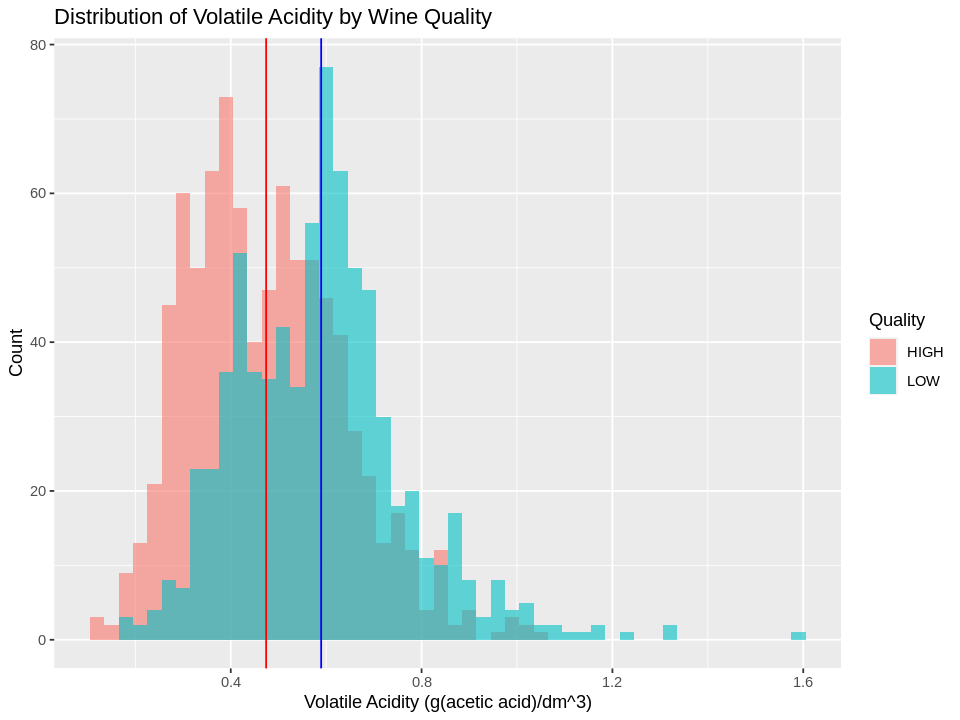

In [ ]:
#visualizing the distribution of volatile acidity by wine quality
options(repr.plot.width = 8, repr.plot.height = 6)

fixed_plot <- wine_data |>
    ggplot(aes(x = volatile_acidity, fill = quality)) +
    geom_histogram(alpha = 0.6, position = "identity", binwidth = 0.03) +
    geom_vline(xintercept = 0.4741462, color = "red") +
    geom_vline(xintercept = 0.5895027, color = "blue") +
    labs(x = "Volatile Acidity (g(acetic acid)/dm^3)",
         y = "Count",
         title = "Distribution of Volatile Acidity by Wine Quality",
         fill = "Quality")
fixed_plot

interpret histograms

### Methods: Plan

In this report we will use rigorous statistical inference methods such as hypothesis testing and confidence intervals to compare the mean of fixed acidity and volatile acidity for low-quality and high-quality red wine. Our data sources are reliable since they are sourced from the UC Irvine Machine Learning Repository. As a result, our report should be trustworthy.

Although we plot the relevant raw data and compute estimates of the means of fixed acidity and volatile acidity. Our approach does not infer if competing hypotheses are reasonable and does not capture the uncertainty of the estimated parameters. We improve these weaknesses by doing hypothesis testing and constructing confidence intervals. We chose to use bootstrap sampling for hypothesis testing and calculating confidence intervals.

We decided to make $\alpha = 0.1$ \
Two hypothesis tests are required since we look at fixed and volatile acidity. \
Hypothesis tests 1: \
$H_0 =$ high quality and low quality red wines have the same mean of fixed acidity\
$H_1 =$ high quality and low quality red wines have the different mean of fixed acidity

Hypothesis tests 2: \
$H_0 =$ high quality and low quality red wines have the same mean of volatile acidity\
$H_1 =$ high quality and low quality red wines have the different mean of volatile acidity

We decided to use $90 \%$ confidence interval. We will calculate the confidence interval of two sample means for fixed acidity: mean of fixed acidity of low quality red wines and mean of fixed acidity of high quality red wine.
and the confidence interval of two sample mean for volatile acidity: mean of volatile acidity of low quality red wines and mean of volatile acidity of high quality red wine. Thus We can conduct that we are $90 \%$ “confident” that a $90 \% $confidence interval captures the value of the population parameter from what range.

- What do you expect to find? \
We expect the mean of fixed acidity and volatile acidity for low-quality and high-quality red wine are different.

- What impact could such findings have? \
Producers can improve their processes to achieve the fixed acidity and volatile acidity required for high quality of red wines.\
Consumers can decide the quality of red wine by determining whether or not the fixed acidity and volatile acidity meet the requirements for a high quality red wine.
- What future questions could this lead to?\
Exploring the relationship between acidity and sensation in red wines.

### References



*   White, N. A. (2019, March 18). Volatile acidity. Waterhouse Lab. https://waterhouse.ucdavis.edu/whats-in-wine/volatile-acidity
* White, N. A. (2019, March 18). Fixed acidity. Waterhouse Lab. https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity
*   UCI Machine Learning Repository: Wine Quality Data Set. (n.d.). UCI. https://archive.ics.uci.edu/ml/datasets/wine+quality

